# Analysis of Drug Usage by Gender

## Dependancies & Data Reading

In [1]:
# Import Library Dependancies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Read Data from Clean CSV
drug_consupmtion_df = pd.read_csv("data/drug_consuption_clean.csv")

# Define the list of drugs within the scope
drugs = ["Amphetamines", "Amyl Nitrite", "Cannabis", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine", "LSD", "Meth", "Mushrooms", "VSA"]

# Display Data Structure
drug_consupmtion_df.head()

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Impulsive,SS,Amphetamines,...,Cannabis,Cocaine,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
0,0,1,35-44 years,Female,Professional Certificate/ Diploma,United Kingdom,Mixed-White/Asian,-0.21712,-1.18084,CL2,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1,1,2,25-34 years,Male,Doctorate Degree,United Kingdom,White,-0.71126,-0.21575,CL2,...,CL4,CL3,CL0,CL4,CL0,CL2,CL2,CL3,CL0,CL0
2,2,3,35-44 years,Male,Professional Certificate/ Diploma,United Kingdom,White,-1.37983,0.40148,CL0,...,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
3,3,4,18-24 years,Female,Masters Degree,United Kingdom,White,-1.37983,-1.18084,CL0,...,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0
4,4,5,35-44 years,Female,Doctorate Degree,United Kingdom,White,-0.21712,-0.21575,CL1,...,CL3,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL2,CL0


## Number of Used Drugs by Gender

In [3]:
# Replace drug usage categories for 1 if drug has been used in the past, 0 otherwise
drug_usage = {"CL0": 0, "CL1": 1, "CL2": 1, "CL3": 1, "CL4": 1, "CL5": 1, "CL6": 1}
drugs_used_df = drug_consupmtion_df.copy()
drugs_used_df[drugs] = drugs_used_df[drugs].replace(drug_usage)

# New column on Dataframe to for the Total Number of Different Drugs used
drugs_used_df["Number of Drugs Used"] = drugs_used_df[drugs].sum(axis=1)

In [4]:
# Create two lists with the Number of Drugs Used divided by gender
drugs_used_men = drugs_used_df.loc[drugs_used_df["Gender"]=="Male"]["Number of Drugs Used"].values
drugs_used_women = drugs_used_df.loc[drugs_used_df["Gender"]=="Female"]["Number of Drugs Used"].values

# Calculate the Avg. Number of Drugs Used for each group
avg_drugs_used_men = drugs_used_men.mean()
avg_drugs_used_women = drugs_used_women.mean()

# Print the Avg. Number of Drugs used for men and women
print(f"Average Number of Drugs Used by Men: {round(avg_drugs_used_men,2)}")
print(f"Average Number of Drugs Used by Women: {round(avg_drugs_used_women,2)}")

Average Number of Drugs Used by Men: 5.33
Average Number of Drugs Used by Women: 3.32


TtestResult(statistic=12.467957593448306, pvalue=3.0640878274253047e-34, df=1744.7871819258455)

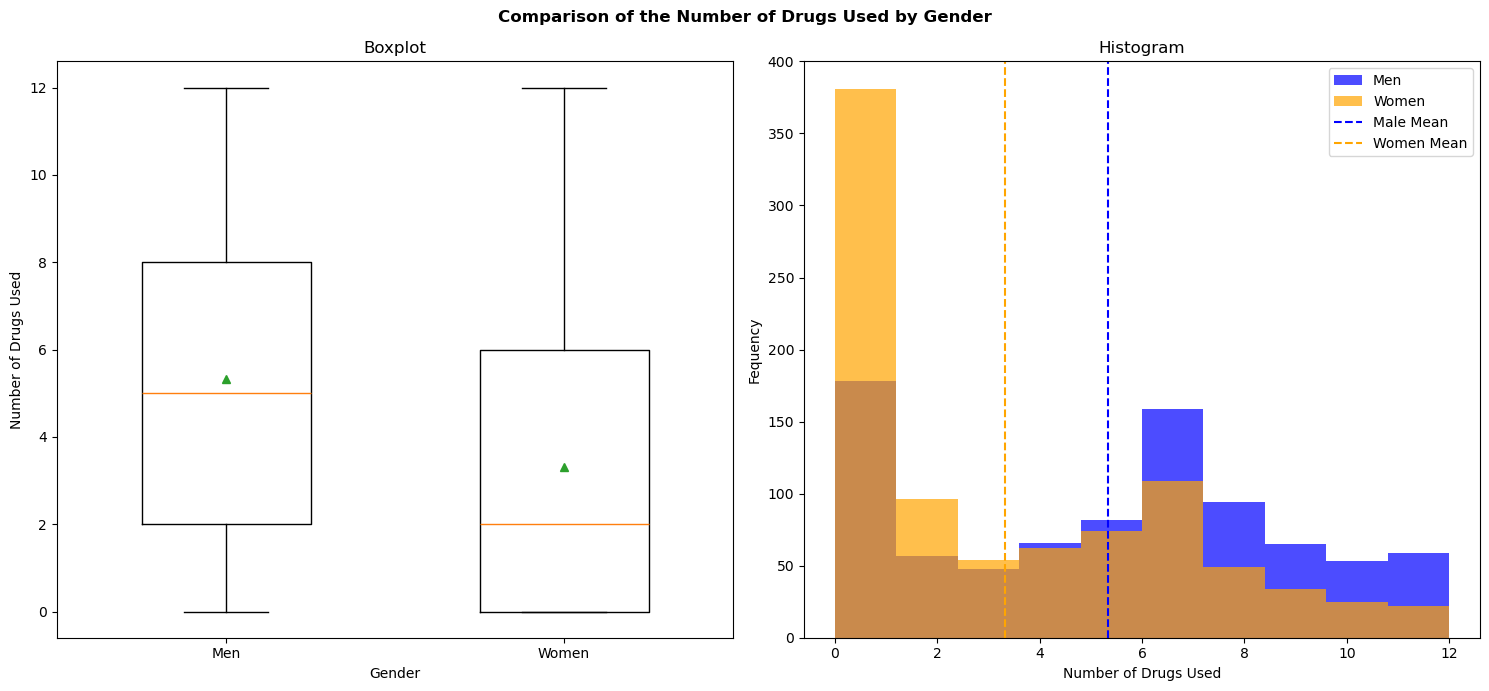

In [5]:
# Compare the distributions of the Number of Drugs in Men and Women
figure, (fig1, fig2) = plt.subplots(1, 2, figsize=(15,7))

# Boxplot Comparison
fig1.boxplot(drugs_used_men, showmeans=True, positions=[1], labels=["Men"], widths=0.5)
fig1.boxplot(drugs_used_women, showmeans=True, positions=[2], labels=["Women"], widths=0.5)
fig1.set_xlabel("Gender")
fig1.set_ylabel("Number of Drugs Used")
fig1.set_title("Boxplot")

# Histogram Comparison
fig2.hist(drugs_used_men, color="blue", label="Men", alpha=0.7)
fig2.hist(drugs_used_women, color="orange", label="Women", alpha=0.7)
fig2.axvline(avg_drugs_used_men, color="blue", linestyle="--", label="Male Mean")
fig2.axvline(avg_drugs_used_women, color="orange", linestyle="--", label="Women Mean")
fig2.set_xlabel("Number of Drugs Used")
fig2.set_ylabel("Fequency")
fig2.set_title("Histogram")
fig2.legend()

# Figure Formatting
plt.suptitle("Comparison of the Number of Drugs Used by Gender", fontweight='bold')
plt.tight_layout()

# Save figure as .png
plt.savefig(f"figures/used_drugs_by_gender.png")

# Calculate the T-test for the means of the two distributions
stats.ttest_ind(drugs_used_men, drugs_used_women, equal_var=False)

Our first approach is to analyse if Men have consumed/tried a wider variety of drugs than Women (in average). Visual representations in the form of a box plot and histogram have been utilized to compare the distributions of these two populations for any discernible discrepancies.

By looking at the figure, it can observe that, in average, women have consumed/tried a slightly less variety of drugs than men (with the average values being 3.32 and 5.33 respectively).

To assess whether a statistical discrepancy exists in drug consumption between men and women, a t-test has been conducted. The hypotheses are formulated as follows:
- Null Hypothesis: There is no difference in the average number of drugs consumed or tried between men and women.
- Alternative Hypothesis: There is a significant difference in the average number of drugs consumed or tried between men and women.

The resulting statistical analysis yields a p-value smaller than 0.01, indicating sufficient evidence to reject the null hypothesis. Consequently, we conclude that, statistically, the average number of drugs consumed or tried differs between men and women.

## Proportions of Drug Usage by Gender

------------------------------------------------------------------------------------------
Analysis of the Drug Consuption Proportions by Gender
------------------------------------------------------------------------------------------
Amphetamines
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              351    571
Used over a Decade Ago  105    109
Used in Last Decade     133     94
Used in Last Year       120     58
Used in Last Month       51     19
Used in Last Week        41     16
Used in Last Day         60     39 

                        Men  Women  Men Proportion  Women Proportion
Never Used              351    571            0.41              0.63
Used over a Decade Ago  105    109            0.12              0.12
Used in Last Decade     133     94            0.15              0.10
Used in Last Year       120     58            0.14              0.06
Used in Last Month       51     1

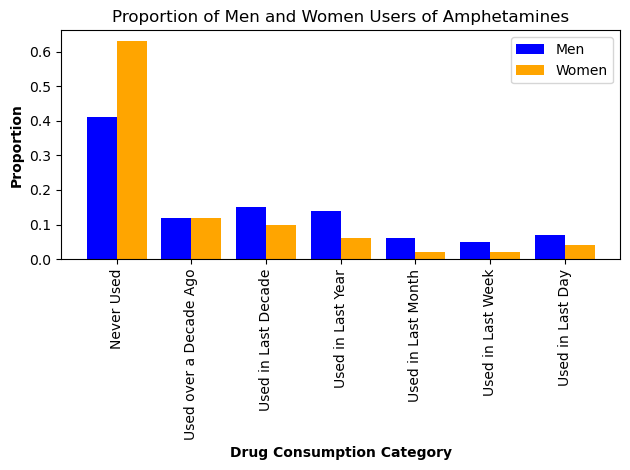

Chi-Square Test of Independence for Amphetamines

Test Statistic: 109.83854566258644
p-value: 2.2034071722849324e-21
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Amyl Nitrite
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              547  684.0
Used over a Decade Ago  105   92.0
Used in Last Decade     119   99.0
Used in Last Year        61   23.0
Used in Last Month       17    4.0
Used in Last Week         9    4.0
Used in Last Day          3    NaN 

                        Men  Women  Men Proportion  Women Proportion
Never Used              547  684.0            0.64              0.75
Used over a Decade Ago  105   92.0            0.12              0.10
Used in Last Decade     119   99.0            0.14              0.11
Used in Last Year        61   23.0            0.07              0.03
Used in Last Month       17    4.0   

C:\Users\Dausu\AppData\Local\Temp\ipykernel_28704\369579385.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = pd.concat([summary, pd.DataFrame(new_data, index=[index])], ignore_index=True)


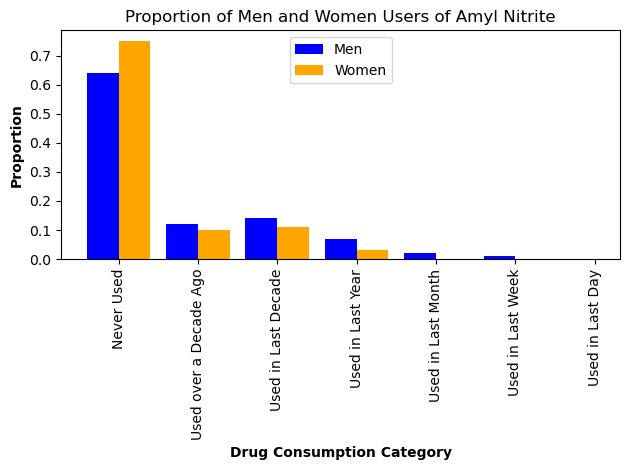

Chi-Square Test of Independence for Amyl Nitrite

Test Statistic: nan
p-value: nan
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Cannabis
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              114    287
Used over a Decade Ago   86    115
Used in Last Decade      96    157
Used in Last Year       101     97
Used in Last Month       78     50
Used in Last Week       107     56
Used in Last Day        279    144 

                        Men  Women  Men Proportion  Women Proportion
Never Used              114    287            0.13              0.32
Used over a Decade Ago   86    115            0.10              0.13
Used in Last Decade      96    157            0.11              0.17
Used in Last Year       101     97            0.12              0.11
Used in Last Month       78     50            0.09              0.06
Used i

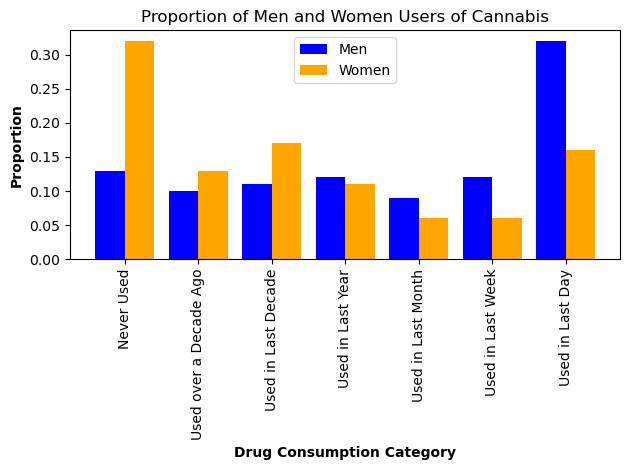

Chi-Square Test of Independence for Cannabis

Test Statistic: 157.73175812523448
p-value: 1.7895529403363722e-31
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Cocaine
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              405    572
Used over a Decade Ago   76     74
Used in Last Decade     135    118
Used in Last Year       152     87
Used in Last Month       55     36
Used in Last Week        24     14
Used in Last Day         14      5 

                        Men  Women  Men Proportion  Women Proportion
Never Used              405    572            0.47              0.63
Used over a Decade Ago   76     74            0.09              0.08
Used in Last Decade     135    118            0.16              0.13
Used in Last Year       152     87            0.18              0.10
Used in Last Month       55     36            

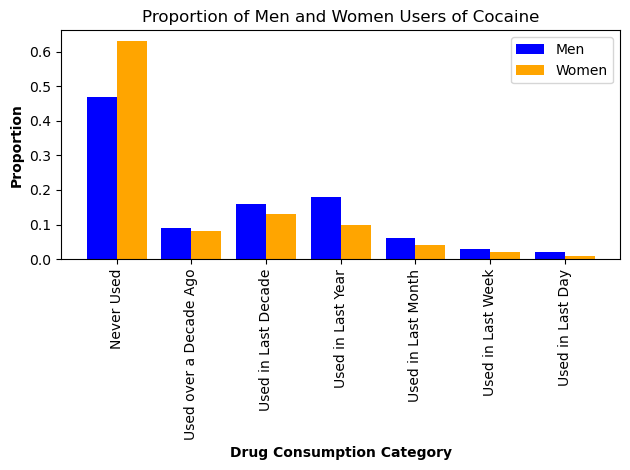

Chi-Square Test of Independence for Cocaine

Test Statistic: 57.14515285288444
p-value: 1.7073885699267129e-10
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Crack
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              706  817.0
Used over a Decade Ago   30   33.0
Used in Last Decade      64   44.0
Used in Last Year        45   10.0
Used in Last Month        5    2.0
Used in Last Week         9    NaN
Used in Last Day          2    NaN 

                        Men  Women  Men Proportion  Women Proportion
Never Used              706  817.0            0.82              0.90
Used over a Decade Ago   30   33.0            0.03              0.04
Used in Last Decade      64   44.0            0.07              0.05
Used in Last Year        45   10.0            0.05              0.01
Used in Last Month        5    2.0            0.01

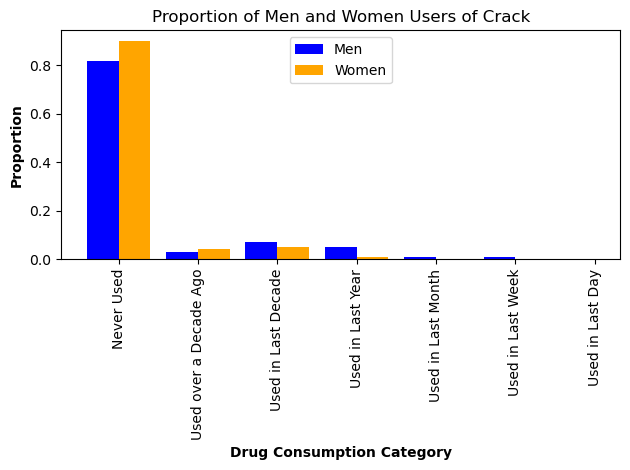

Chi-Square Test of Independence for Crack

Test Statistic: nan
p-value: nan
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Ecstasy
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              378    592
Used over a Decade Ago   47     58
Used in Last Decade     123     95
Used in Last Year       167     88
Used in Last Month      100     41
Used in Last Week        35     24
Used in Last Day         11      8 

                        Men  Women  Men Proportion  Women Proportion
Never Used              378    592            0.44              0.65
Used over a Decade Ago   47     58            0.05              0.06
Used in Last Decade     123     95            0.14              0.10
Used in Last Year       167     88            0.19              0.10
Used in Last Month      100     41            0.12              0.05
Used in Last W

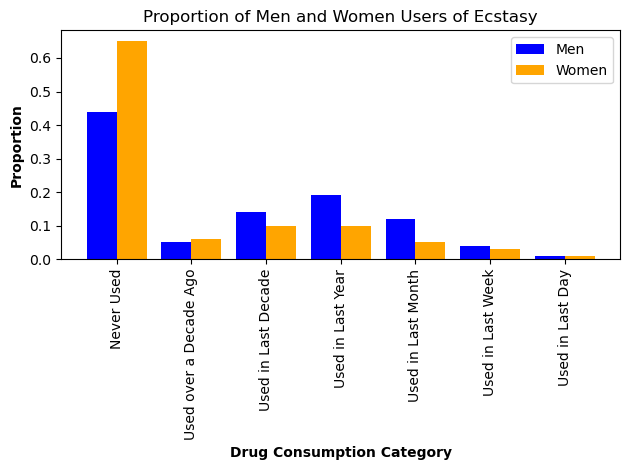

Chi-Square Test of Independence for Ecstasy

Test Statistic: 102.56857905788384
p-value: 7.301083517766771e-20
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Heroin
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              690    814
Used over a Decade Ago   33     29
Used in Last Decade      57     30
Used in Last Year        43     19
Used in Last Month       16      8
Used in Last Week        12      3
Used in Last Day         10      3 

                        Men  Women  Men Proportion  Women Proportion
Never Used              690    814            0.80              0.90
Used over a Decade Ago   33     29            0.04              0.03
Used in Last Decade      57     30            0.07              0.03
Used in Last Year        43     19            0.05              0.02
Used in Last Month       16      8            0.0

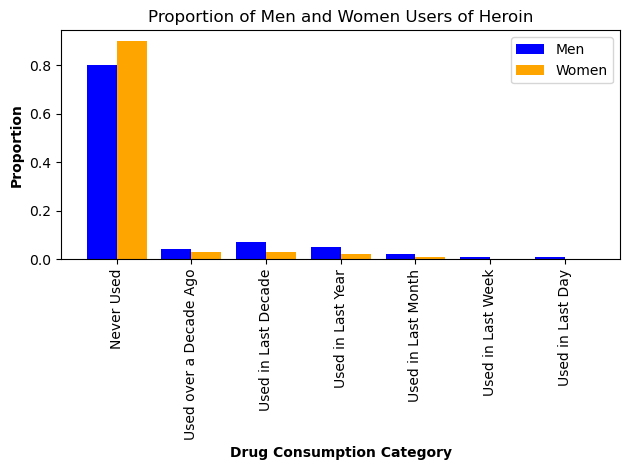

Chi-Square Test of Independence for Heroin

Test Statistic: 38.866196108857565
p-value: 7.60309024094608e-07
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Ketamine
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              615  788.0
Used over a Decade Ago   23   20.0
Used in Last Decade      87   46.0
Used in Last Year        82   36.0
Used in Last Month       29   10.0
Used in Last Week        22    6.0
Used in Last Day          3    NaN 

                        Men  Women  Men Proportion  Women Proportion
Never Used              615  788.0            0.71              0.87
Used over a Decade Ago   23   20.0            0.03              0.02
Used in Last Decade      87   46.0            0.10              0.05
Used in Last Year        82   36.0            0.10              0.04
Used in Last Month       29   10.0            0.0

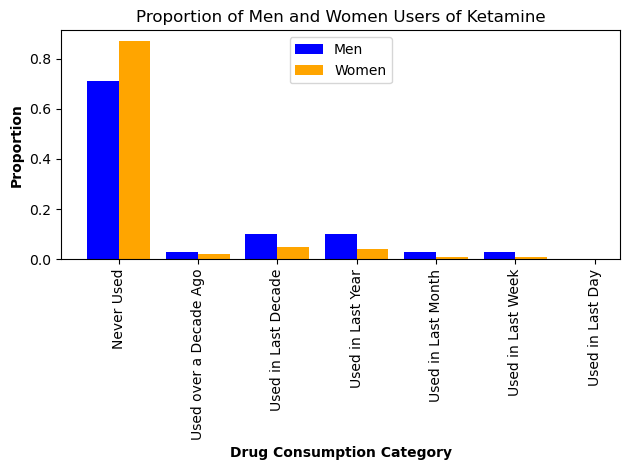

Chi-Square Test of Independence for Ketamine

Test Statistic: nan
p-value: nan
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
LSD
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              388    637
Used over a Decade Ago  125    120
Used in Last Decade     107     59
Used in Last Year       135     52
Used in Last Month       55     30
Used in Last Week        40      7
Used in Last Day         11      1 

                        Men  Women  Men Proportion  Women Proportion
Never Used              388    637            0.45              0.70
Used over a Decade Ago  125    120            0.15              0.13
Used in Last Decade     107     59            0.12              0.07
Used in Last Year       135     52            0.16              0.06
Used in Last Month       55     30            0.06              0.03
Used in Last We

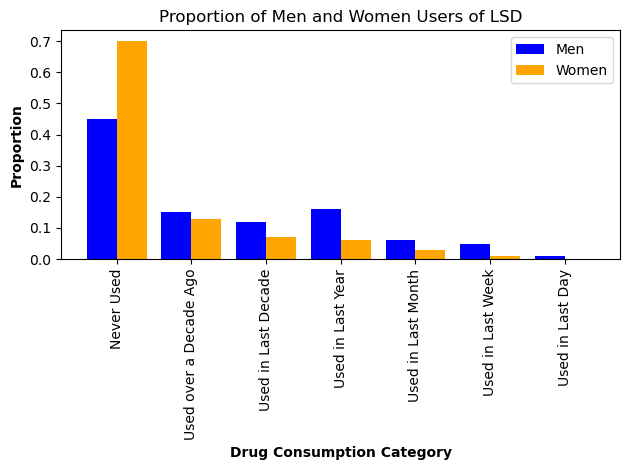

Chi-Square Test of Independence for LSD

Test Statistic: 149.117100438426
p-value: 1.1891766197309703e-29
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Meth
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              576    760
Used over a Decade Ago   21     18
Used in Last Decade      53     37
Used in Last Year       102     37
Used in Last Month       29     19
Used in Last Week        29     16
Used in Last Day         51     19 

                        Men  Women  Men Proportion  Women Proportion
Never Used              576    760            0.67              0.84
Used over a Decade Ago   21     18            0.02              0.02
Used in Last Decade      53     37            0.06              0.04
Used in Last Year       102     37            0.12              0.04
Used in Last Month       29     19            0.03      

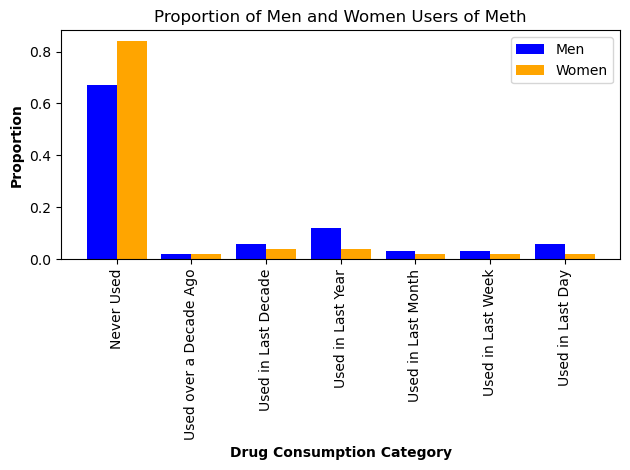

Chi-Square Test of Independence for Meth

Test Statistic: 78.18437208727437
p-value: 8.469131910666618e-15
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Mushrooms
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              351    589
Used over a Decade Ago   98    100
Used in Last Decade     136    102
Used in Last Year       173     77
Used in Last Month       75     25
Used in Last Week        26     11
Used in Last Day          2      2 

                        Men  Women  Men Proportion  Women Proportion
Never Used              351    589            0.41              0.65
Used over a Decade Ago   98    100            0.11              0.11
Used in Last Decade     136    102            0.16              0.11
Used in Last Year       173     77            0.20              0.08
Used in Last Month       75     25            0.09

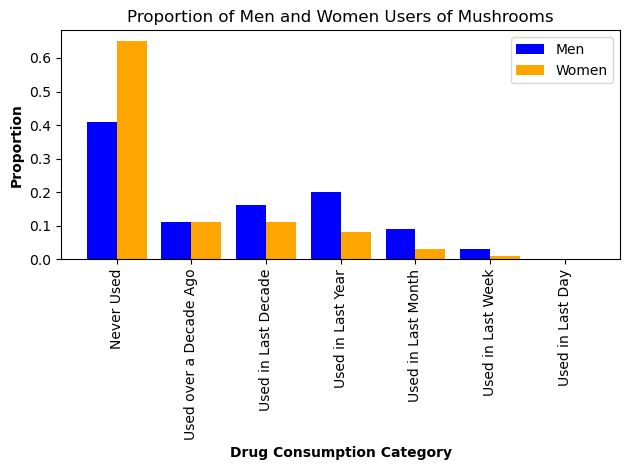

Chi-Square Test of Independence for Mushrooms

Test Statistic: 132.02161452674858
p-value: 4.821998466204878e-26
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
VSA
------------------------------------------------------------------------------------------
                        Men  Women
Never Used              624    753
Used over a Decade Ago   95     80
Used in Last Decade      85     42
Used in Last Year        35     21
Used in Last Month        8      4
Used in Last Week        10      3
Used in Last Day          4      3 

                        Men  Women  Men Proportion  Women Proportion
Never Used              624    753            0.72              0.83
Used over a Decade Ago   95     80            0.11              0.09
Used in Last Decade      85     42            0.10              0.05
Used in Last Year        35     21            0.04              0.02
Used in Last Month        8      4            0.01

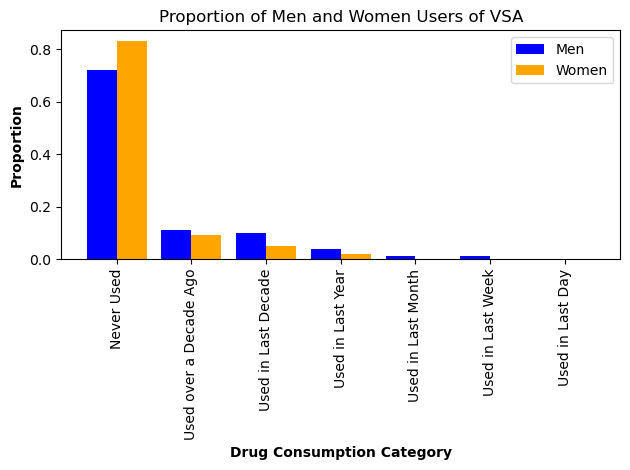

Chi-Square Test of Independence for VSA

Test Statistic: 35.55220561511933
p-value: 3.367810950243976e-06
Degrees of Freedom: 6


------------------------------------------------------------------------------------------
Chi-Square Test p-valus Summary
------------------------------------------------------------------------------------------


            Drug       p-value
0   Amphetamines  2.203407e-21
1   Amyl Nitrite           NaN
2       Cannabis  1.789553e-31
3        Cocaine  1.707389e-10
4          Crack           NaN
5        Ecstasy  7.301084e-20
6         Heroin  7.603090e-07
7       Ketamine           NaN
8            LSD  1.189177e-29
9           Meth  8.469132e-15
10     Mushrooms  4.821998e-26
11           VSA  3.367811e-06


In [6]:
# Print Header
print("------------------------------------------------------------------------------------------")
print("Analysis of the Drug Consuption Proportions by Gender")
print("------------------------------------------------------------------------------------------")

# Initialize Summary DataFrame
summary = pd.DataFrame(columns=["Drug", "p-value"])
index = 1

# For each Drug...
for drug in drugs:

    # Print Subheader
    print(drug)
    print("------------------------------------------------------------------------------------------")

    # Count the number of people group by Gender and Drug Consuption Pattern
    count_drug_usage_by_gender = drug_consupmtion_df.groupby(["Gender", drug]).count()["ID"]
    count_drug_usage_by_gender = pd.DataFrame({"Men": count_drug_usage_by_gender["Male"], "Women": count_drug_usage_by_gender["Female"]})
    count_drug_usage_by_gender.index = ["Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"]
    print(count_drug_usage_by_gender, "\n")

    # Calculate the Proportions by Gender for each Drug Consuption Category
    count_drug_usage_by_gender["Men Proportion"] = round(count_drug_usage_by_gender["Men"]/count_drug_usage_by_gender["Men"].sum(), 2)
    count_drug_usage_by_gender["Women Proportion"] = round(count_drug_usage_by_gender["Women"]/count_drug_usage_by_gender["Women"].sum(), 2)
    print(count_drug_usage_by_gender, "\n")

    # Plot the Proportion Information on a Bar Chart
    # Set the bar width
    bar_width = 0.4
    # Set the positions for the "x" axis
    x1 = range(7)
    x2 = [x+bar_width for x in x1]
    # Plot Bar Charts
    plt.bar(x1, count_drug_usage_by_gender["Men Proportion"], color="blue", label="Men", width=bar_width)
    plt.bar(x2, count_drug_usage_by_gender["Women Proportion"], color="orange", label="Women", width=bar_width)
    plt.xticks([r+(bar_width/2) for r in x1], count_drug_usage_by_gender.index, rotation=90)
    plt.xlabel("Drug Consumption Category", fontweight='bold')
    plt.ylabel("Proportion", fontweight='bold')
    plt.title(f"Proportion of Men and Women Users of {drug}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/usage_proportion_by_gender_{drug}.png")
    plt.show()    

    # Compute the Chi-square Test for the Hypothesis of Independence of between the Drug Consuption of Men and Women
    contingency_table = count_drug_usage_by_gender[['Men', 'Women']]
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-Square Test of Independence for {drug}\n")
    print(f"Test Statistic: {chi2_stat}")
    print(f"p-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")

    print("\n")
    print("------------------------------------------------------------------------------------------")

    # Update Summary Table
    new_data = {"Drug": drug, "p-value": p_val}
    summary = pd.concat([summary, pd.DataFrame(new_data, index=[index])], ignore_index=True)
    index += 1

# Print Summary DataFrame
print("Chi-Square Test p-valus Summary")
print("------------------------------------------------------------------------------------------")
print("\n")
print(summary)

Our second approach is to compare the if there is any difference in the consumption behaviour of each Drug between men and women. Individuals are categorized in the below groups:
- "Never Used"
- "Used over a Decade Ago"
- "Used in Last Decade"
- "Used in Last Year"
- "Used in Last Month"
- "Used in Last Week"
- "Used in Last Day"

Afterwards, the proportions of men and women on each category is computed for each type of Drug and a side-to-side comparison is presented on a Bar Chart.

The consumption behaviour greatly varies between drugs. With crack or heroin showing lower proportions of usage in the last days, week, months, and years. While other drugs like Cannabis or Ecstasy presenting higher proportions of usage in more recent timeframes.

To assess if there is any significant statistical difference between the consumption patters of men and women, a Chi-Square Test is conducted for each Drug. The hypotheses are formulated as follows:
- Null Hypothesis: The proportions of drug consumption by category are the same between men and women.
- Alternative Hypothesis: The proportions of drug consumption by category are different between men and women.

The resulting statistical analysis yields p-value smaller than 0.01 for Amphetamines, Cannabis, Cocaine, Ecstasy, Heroin, LSD, Meth, Mushrooms, and VSA.

Due to the lack of sufficient observations in the Drug Consumption for Amyl Nitrite, Crack, and Ketamine, the Chi-Square cannot be computed for these drugs.

Based on the above results, there is sufficient evidence to conclude that the proportions of drug consumption by category are different between men and women for:
- Amphetamines
- Cannabis
- Cocaine
- Ecstasy
- Heroin
- LSD
- Meth
- Mushrooms
- VSA

End of file